# Les bases de Pandas




Pandas est la librairie python pour la gestion des 'DataFrame' c'est l'équivalent d'une feuille excel ou d'une table d'une base de donnée de type SQL. 

* Les lignes représentent les individus (ou observations).
* Les colonnes représentent les variables  (quantitative, qualitative ).

Commençons pas jouer un peu avec cette librairie

In [0]:
"pour télécharger les données: n'excécuter cette cellule qu'une seule fois"

!git clone https://github.com/vincentvigon/assets_ml

Cloning into 'assets_ml'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Unpacking objects: 100% (80/80), done.


In [0]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import datetime
import statsmodels

np.set_printoptions(precision=2,linewidth=500,suppress=True)


""" une fonction utilitaire qui renvoie une dataFrame un peu complexe qu'on utilisera plus loin"""
def make_df():
    df = pd.DataFrame({
        'nbPiece': [2, 3, 4, 1,4],
        'surface': [20.5, 35, None, 15,120],
        'quartier': pd.Categorical(["populaire", "populaire", "chic", "moyen","chic"]),
        'construction': [datetime.date(2012, 5, 1),datetime.date(2015, 10, 3),datetime.date(1999, 12, 21),datetime.date(2000, 1, 1),datetime.date(1969, 12, 11),],
        'prix':[60000,120000,np.nan,30000,200000],
        'nomProprio':["Toto","Momo","Fifi","Lolo",None]
    })
    return df

df=make_df()
df


,nbPiece,surface,quartier,construction,prix,nomProprio
0,2,20.5,populaire,2012-05-01,60000.0,Toto
1,3,35.0,populaire,2015-10-03,120000.0,Momo
2,4,NaN,chic,1999-12-21,NaN,Fifi
3,1,15.0,moyen,2000-01-01,30000.0,Lolo
4,4,120.0,chic,1969-12-11,200000.0,None


## Structure des series et dataframe



### Series

Une série c'est une liste de valeurs indexées. On peut aussi lui donner un nom

In [0]:
"une série d'entier indexée par des string"
s1 = pd.Series(data=np.random.randint(0,10,size=5), index=['a', 'b', 'c', 'd', 'e'],name="toto1")
s1

a    6
b    2
c    7
d    2
e    4
Name: toto1, dtype: int64

In [0]:
print("s1.values:\n",s1.values,type(s1.values))
print("s1.index:\n",s1.index,type(s1.index))
print("s1.index.values:\n",s1.index.values,type(s1.index.values))

s1.values:
 [6 2 7 2 4] <class 'numpy.ndarray'>
s1.index:
 Index(['a', 'b', 'c', 'd', 'e'], dtype='object') <class 'pandas.core.indexes.base.Index'>
s1.index.values:
 ['a' 'b' 'c' 'd' 'e'] <class 'numpy.ndarray'>


In [0]:
"une série de flottant indexée par des string"
s2 = pd.Series(np.random.normal(size=4), index=['a', 'b', 'c', 'd'])
s2

a   -1.751743
b    0.023330
c    0.333568
d    0.411495
dtype: float64

### Dataframe = plusieurs series

Une `DataFrame` c'est plusieurs `Series` collées en colonnes. Ces colonnes partagent le même index et chaque colonne a un nom. 

In [0]:
"création d'un DataFrame à partir d'un tableau"
df0=pd.DataFrame(np.random.randint(0,10,size=(5,3)),columns=["o","i","e"],index=np.linspace(10,13,5))
df0

,o,i,e
10.00,4,1,6
10.75,4,4,2
11.50,3,5,2
12.25,3,1,5
13.00,3,9,8


***A vous:***  $(2\heartsuit)$ si on ne précise pas, quel est l'index par défaut, quel nom de colonnes par défaut?

In [0]:
"création d'une DataFrame en collant des Series"
df=pd.DataFrame({"col1":s1,"col2":s2})
df

,col1,col2
a,6,-1.751743
b,2,0.023330
c,7,0.333568
d,2,0.411495
e,4,NaN


***A vous:*** $(1\heartsuit)$ Pourquoi a-t-on un Nan?

In [0]:
print(df.index)
print(df.columns)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Index(['col1', 'col2'], dtype='object')


### Récupération d'un colonne ou d'une ligne



In [0]:
df

,col1,col2
a,6,-1.751743
b,2,0.023330
c,7,0.333568
d,2,0.411495
e,4,NaN


In [0]:
col=df['col1']
col

a    6
b    2
c    7
d    2
e    4
Name: col1, dtype: int64

In [0]:
lin=df.loc['a'] # 'loc' pour extraire une ligne
lin

col1    6.000000
col2   -1.751743
Name: a, dtype: float64

Quand on récupère une ligne ou une colonne d'une dataframe, on retombe sur une serie. 

In [0]:
type(col),type(lin)

(pandas.core.series.Series, pandas.core.series.Series)

***A vous:*** Que donne `df['a']` $(1\heartsuit)$?

On peut aussi extraire la ième-ligne  avec `iloc`:

In [0]:
df.iloc[0]

col1    7.000000
col2    0.441819
Name: a, dtype: float64

***A vous:***  $(1\heartsuit)$ Quand on extrait une ligne ou une colonne d'une DataFrame: quelle est l'index et quelle est le nom de la Series obtenue? 

***A vous:***  $(2\heartsuit)$ Créez une dataframe indicée par les entiers, mais non ordonnés. Comparez `df.loc[0]` et `df.iloc[0]`



## Manipulation $\hookleftarrow$


### Création d'un exemple complexe

In [0]:
df= make_df()
df

,nbPiece,surface,quartier,construction,prix,nomProprio
0,2,20.5,populaire,2012-05-01,60000.0,Toto
1,3,35.0,populaire,2015-10-03,120000.0,Momo
2,4,NaN,chic,1999-12-21,NaN,Fifi
3,1,15.0,moyen,2000-01-01,30000.0,Lolo
4,4,120.0,chic,1969-12-11,200000.0,None


***Remarque:***  `pd.Categorical`: c'est une 'enumeration': 

* "populaire" est codé par 0, 
* "chic" par 1, 
* "moyen" par 2

C'est informatiquement plus propre que des chaines de caractères, et cela fait gagner de l'espace mémoire. 

Autre manière de procéder: vous pouvez stocker de simple entier dans la dataFrame, et stocké à côté des dictionnaires de traduction: `index_to_quartier` et son inverse `quartier_to_index`. 

### Sélection de lignes et colonnes

Observez à chaque fois si la sélection renvoie une `Series` ou une `DataFame`. Demandez-vous quel est l'index.  

In [0]:
"sélection d'une colonne via les crochets"
df['nbPiece'] 

0    2
1    3
2    4
3    1
4    4
Name: nbPiece, dtype: int64

In [0]:
"sélection d'une colonne via un point"
df.nbPiece

0    2
1    3
2    4
3    1
4    4
Name: nbPiece, dtype: int64

la méthode 'loc' permet de jouer avec les lignes et les colonnes

In [0]:
df.loc[0,:]

nbPiece                  2
surface               20.5
quartier         populaire
construction    2012-05-01
prix                 60000
nomProprio            Toto
Name: 0, dtype: object

In [0]:
df.loc[[0, 2],:]

,nbPiece,surface,quartier,construction,prix,nomProprio
0,2,20.5,populaire,2012-05-01,60000.0,Toto
2,4,NaN,chic,1999-12-21,NaN,Fifi


***A vous:*** `df.loc[[2],:]` renvoie une `Series` ou une `DataFame` $(1\heartsuit)$?

***A vous:*** Qu'est-ce qui est bizarre dans le résultat suivant $(1\heartsuit)$?

In [0]:
df.loc[:2,['nbPiece','surface']]

,nbPiece,surface
0,2,20.5
1,3,35.0
2,4,NaN


### Copy or not copy, that is the question

La règle  bizarre: quand on sélection des lignes ou des colonnes, on ne sait pas trop si on fait des copie ou des vues... Pour éviter les problèmes, suivez mes "régles d'or": 

* Toujours vérifier que ce que l'on a fait à de l'effet sur la dataFrame
* Toujours faire une copie explicite de la dataFrame pour en extraire un bout. Exemple:

       df_restreinte=df.loc[:, ['nbPiece', 'surface']].copy()
    
* Ne vous vous autorisez des "alias" uniquement pour **une** colonne complètes (et dans ce cas, cela crée un vue sur la colonne en question). Exemple: 

       nbPiece=df.loc[:, 'nbPiece']
       #ou bien
       nbPiece=df['nbPiece']
       
 * et si vous pouvez,  évitez complètement les "alias".


Ci-dessous, on observe les bizareries de pandas. 





In [0]:
"sélection de deux colonnes"
df=make_df()
twoCol=df.loc[:, ['nbPiece', 'surface']]
twoCol['nbPiece']*=0
twoCol

,nbPiece,surface
0,0,20.5
1,0,35.0
2,0,NaN
3,0,15.0
4,0,120.0


***A vous:***  $(1\heartsuit)$ Vérifiez que pandas a fait une copie des données

In [0]:
"sélection d'une colonne"
oneCol=df.loc[:, 'nbPiece']
oneCol*=0

***A vous:***  $(1\heartsuit)$ Vérifiez que ci-dessus pandas a fait une vue sur des données.

***A vous:*** Vérifiez $(2\heartsuit)$ que quand vous sélectionner des lignes (pas toutes) et des colonnes, pandas crée une copie. 


*** Attention:*** si on sélectionne plusieurs colonnes sans le `loc`: On obtient obtien aussi une vue sur les données, mais elle n'est pas modifiable. Si on essayer de la modifier le message d'erreur est assez explicite, et vous indique quoi faire.

In [0]:
"ceci est une vue non modifiable"
twoCol_bis=df[['quartier', 'nbPiece']]
twoCol_bis

,quartier,nbPiece
0,populaire,0
1,populaire,0
2,chic,0
3,moyen,0
4,chic,0


***A vous:*** Modifier $(2\heartsuit)$ cette DataFrame et traduisez le message d'erreur obtenu. 

### Sélection par valeurs

C'est la même logique qu'avec `numpy`

In [0]:
df=make_df()
"sélection d'indices en fonction du prix"
df["prix"]<=100000

0     True
1    False
2    False
3     True
4    False
Name: prix, dtype: bool

In [0]:
"voyons la sous-partie de la dataFrame correspondante"
df.loc[df["prix"]<=100000]

,nbPiece,surface,quartier,construction,prix,nomProprio
0,2,20.5,populaire,2012-05-01,60000.0,Toto
3,1,15.0,moyen,2000-01-01,30000.0,Lolo


### Apply

la méthode apply permet d'effectuer des opérations ligne à ligne ou colonne par colonne. Observons:

In [0]:
mat=np.ones([6,2])
mat

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [0]:
np.sum(mat,axis=0)

array([6., 6.])

In [0]:
np.sum(mat,axis=1)

array([2., 2., 2., 2., 2., 2.])

In [0]:
df=pd.DataFrame(mat)
df

,0,1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0


In [0]:
df.apply(sum,axis=0)

0    6.0
1    6.0
dtype: float64

In [0]:
df.apply(sum,axis=1)

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
dtype: float64

### transformation de variable

In [0]:
"""ajoutons la variable 'prix au metre carré' """
df['prixAuM2']=np.round(df.prix/df.surface) # interaction entre pandas et numpy

,nbPiece,surface,quartier,construction,prix,nomProprio,prixAuM2
0,2,20.5,populaire,2012-05-01,60000.0,Toto,2927.0
1,3,35.0,populaire,2015-10-03,120000.0,Momo,3429.0
2,4,NaN,chic,1999-12-21,NaN,Fifi,NaN
3,1,15.0,moyen,2000-01-01,30000.0,Lolo,2000.0
4,4,120.0,chic,1969-12-11,200000.0,None,1667.0


In [0]:
"""ajoutons une variable donnant un prix déprécié en fonction du nombre d'année et de la surface.
Comme c'est une opération plus complexe, on utilise une fonction qui agit sur une ligne"""

def priceDepreciatedFunction(line):
    dateNow = datetime.date(2016, 10, 17)
    buildDate=line['construction']
    nbDays=(dateNow - buildDate).days
    return line['prix'] - 0.5 * line['surface'] * nbDays


df["priceDepreciated"]=df.apply(priceDepreciatedFunction,axis=1)
df

,nbPiece,surface,quartier,construction,prix,nomProprio,prixAuM2,priceDepreciated
0,2,20.5,populaire,2012-05-01,60000.0,Toto,2927.0,43292.5
1,3,35.0,populaire,2015-10-03,120000.0,Momo,3429.0,113350.0
2,4,NaN,chic,1999-12-21,NaN,Fifi,NaN,NaN
3,1,15.0,moyen,2000-01-01,30000.0,Lolo,2000.0,-16005.0
4,4,120.0,chic,1969-12-11,200000.0,None,1667.0,-826720.0


In [0]:
"""transformons les prix pour qu'ils apparaissent en millier d'euro"""
df["prix"] /= 1000
df["priceDepreciated"]/=1000
df

,nbPiece,surface,quartier,construction,prix,nomProprio,prixAuM2,priceDepreciated
0,2,20.5,populaire,2012-05-01,60.0,Toto,2927.0,43.2925
1,3,35.0,populaire,2015-10-03,120.0,Momo,3429.0,113.3500
2,4,NaN,chic,1999-12-21,NaN,Fifi,NaN,NaN
3,1,15.0,moyen,2000-01-01,30.0,Lolo,2000.0,-16.0050
4,4,120.0,chic,1969-12-11,200.0,None,1667.0,-826.7200


### Valeurs manquantes

In [0]:
"nombre de Nan par ligne"
df.apply(lambda line:sum(line.isnull()),axis=1)

0    0
1    0
2    4
3    0
4    1
dtype: int64

In [0]:
""" le mot clef lambda sert à définir une fonction sur une ligne sans lui donner de nom. On aurait aussi pu faire:"""
def fonctionAnonyme(line):
    return sum(line.isnull())

df.apply(fonctionAnonyme,axis=1)

0    0
1    0
2    4
3    0
4    1
dtype: int64

In [0]:
"nombre de Nan par colonne"
df.apply(lambda col: sum(col.isnull()), axis=0)

nbPiece             0
surface             1
quartier            0
construction        0
prix                1
nomProprio          1
prixAuM2            1
priceDepreciated    1
dtype: int64

In [0]:
"""on remplace les surfaces manquantes par la surface moyenne du quartier correspondant"""
def surfaceNullToMeanOfQuartier(line):
    if pd.isnull(line['surface']) : return df.surface[df.quartier==line.quartier].mean() #la méthode mean ne prend pas en compte les Nan
    else : return line['surface']

df['surface']=df.apply(surfaceNullToMeanOfQuartier,axis=1)


"""on remplace les prix manquants par la surface * le prix moyen au metre carré par quartier  """
def prixNullReplacement(line):
    if pd.isnull(line.prix):
        findQuartier=df.quartier==line.quartier
        mean=(df.prix[findQuartier]/df.surface[findQuartier]).mean()
        return mean* line.surface
    else : return line.prix

df.prix=df.apply(prixNullReplacement,axis=1)
"""et voilà le travail"""
df

,nbPiece,surface,quartier,construction,prix,nomProprio,prixAuM2,priceDepreciated
0,2,20.5,populaire,2012-05-01,60.0,Toto,2927.0,43.2925
1,3,35.0,populaire,2015-10-03,120.0,Momo,3429.0,113.3500
2,4,120.0,chic,1999-12-21,200.0,Fifi,NaN,NaN
3,1,15.0,moyen,2000-01-01,30.0,Lolo,2000.0,-16.0050
4,4,120.0,chic,1969-12-11,200.0,None,1667.0,-826.7200


## De la DataFrame aux algos d'apprentissage $\hookleftarrow$

### Pandas et Statsmodel

Certaines libbraires, comme statsmodel, interagissent avec pands. Observons un exemple. 

In [0]:
def create_data_invention():

    def sigmoide(x):
        return 1/(1+np.exp(-x))

    np.random.seed(28)
    N=20000
    fume=np.random.choice(a=[0,1],p=[0.7,0.3],size=N)
    moto=np.random.choice(a=[0,1],p=[0.85,0.15],size=N)
    film_romantique=np.random.choice(a=[0,1],p=[0.8,0.2],size=N)

    proba_mourir_70_ans=sigmoide(-2 + fume*3 + moto*2 + film_romantique*0 )
    mort_avant_70_ans=(np.random.random(size=N)<proba_mourir_70_ans)
    
    df = pd.DataFrame()
    df["fume"]=fume
    df["moto"]=moto
    df["film_romantique"]=film_romantique
    df["mort_avant_70_ans"]=mort_avant_70_ans.astype(int)

    return df

In [0]:
df0=create_data_invention()
df0["const"]=1
df0.head(10)

,fume,moto,film_romantique,mort_avant_70_ans,const
0,1,0,0,1,1
1,0,0,0,0,1
2,0,0,1,1,1
3,0,0,0,0,1
4,1,1,0,1,1
5,0,0,0,1,1
6,0,1,0,1,1
7,1,0,0,1,1
8,1,0,1,0,1
9,1,0,1,1,1


In [0]:
import statsmodels.api as sm

glm = sm.GLM(endog=df0["mort_avant_70_ans"], exog=df0[["fume","moto","film_romantique","const"]], family=sm.families.Binomial())
res = glm.fit()
res.params

fume               3.046780
moto               2.065974
film_romantique    0.016060
const             -2.040122
dtype: float64

### Mode opératoire conseillé

Mais d'autre librairies, comme `sklearn` qu'on va beaucoup utiliser, ne veulent que des matrices. Et attention: si vous avez le malheur de lui rentrer une dataFrame avec un indexe numérique: `sklearn` va considérer cet index comme une variable à part entière (catastrophe). 

Pour faire du traitement de donnée, la technique de travail que je conseille est la suivante :

* 1/ Effectuer tout le nettoyage des données (remplacement des nan), les statistiques descriptives, la transformation et l'ajout de certaines variable 
avec pandas et ses dataFrame.
* 2/ Effectuer les taches d'apprentissages statistique à partir de tableau numpy; en utilisant sklearn, statmodels ou bien vos propres outils. 

### Récupérer les valeurs numériques uniquement

Maintenant, nous transformons une partie de notre dataFrame en un brave tableau numpy numérique :
 on supprime l'index, le nom des colonnes et l'on transforme les noms de catégories en numéro

In [0]:
df=make_df()
"extraction d'une partie (copie)"
df2=df.loc[[0,1,3,4],["prix","nbPiece","surface","quartier"]]
df2

,prix,nbPiece,surface,quartier
0,60000.0,2,20.5,populaire
1,120000.0,3,35.0,populaire
3,30000.0,1,15.0,moyen
4,200000.0,4,120.0,chic


In [0]:
""" transformons une variable qualitative en un indice la représentant.   """
df2["quartier"]=df2["quartier"].map({"populaire":0, "chic":2, "moyen":1})
df2

,prix,nbPiece,surface,quartier
0,60000.0,2,20.5,0
1,120000.0,3,35.0,0
3,30000.0,1,15.0,1
4,200000.0,4,120.0,2


In [0]:
""" transformons notre dataFrame en une simple matrice numpy  """
mat=df2.values
print(type(mat))
print(mat)

<class 'numpy.ndarray'>
[[60000.0 2 20.5 0]
 [120000.0 3 35.0 0]
 [30000.0 1 15.0 1]
 [200000.0 4 120.0 2]]


On pourra utiliser cette matrice pour faire une regression linéaire par exemple.

##  Jouons avec les prénoms $\hookleftarrow$

Avant de rentrer dans la technique, effectuons un travail amusant avec l'aide de `pandas`. 

In [0]:
df = pd.read_csv("assets_ml/dataframe/nat2015.txt",sep="\t",encoding='latin-1')
df.head(10)

,sexe,preusuel,annais,nombre
0,1,A,1980,3.0
1,1,A,1998,3.0
2,1,A,XXXX,21.0
3,1,AADEL,1976,5.0
4,1,AADEL,1978,3.0
5,1,AADEL,1980,3.0
6,1,AADEL,1981,5.0
7,1,AADEL,1982,4.0
8,1,AADEL,1983,3.0
9,1,AADEL,1987,5.0


***A vous:*** $(1\heartsuit)$ Quelle est la signification des variables `preusuel` et `annais`?

In [0]:
tab = df.pivot_table(index="annais", columns="sexe", values="nombre", aggfunc="sum")
tab.head()

sexe,1,2
annais,,
1900,177483.0,237721.0
1901,196048.0,257593.0
1902,204440.0,261516.0
1903,207457.0,261537.0
1904,214244.0,264926.0


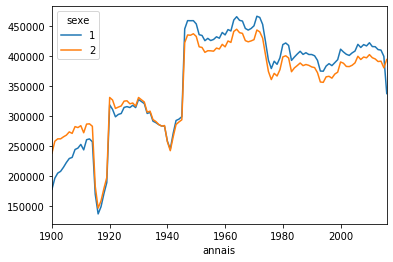

In [0]:
tab.plot();

Customisons le graphique

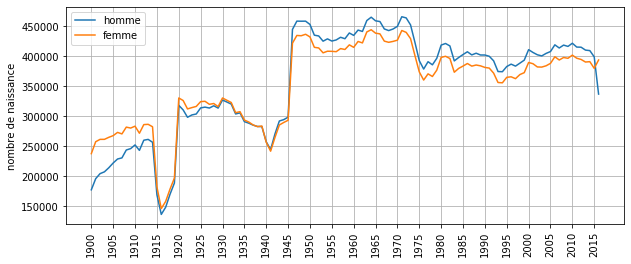

In [0]:
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(tab.index,tab[1].values,label="homme")
ax.plot(tab.index,tab[2].values,label="femme")
ax.set_xticks(tab.index[0::5])
ax.set_xticklabels(tab.index[0::5],rotation="vertical")
ax.set_ylabel("nombre de naissance")
ax.grid(True)
ax.legend();

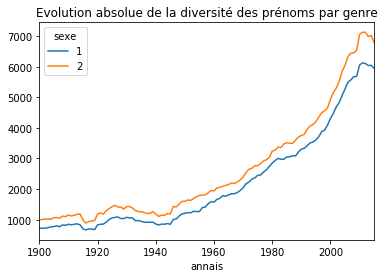

In [0]:
""" on supprime les années de naissance inconnues """
df = df.loc[df["annais"] != "XXXX"]
tab = df.pivot_table(index="annais", columns="sexe", values="preusuel", aggfunc="count")
tab.plot(title="Evolution absolue de la diversité des prénoms par genre");

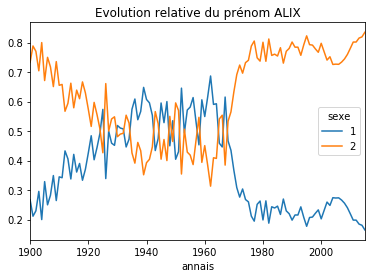

In [0]:
def evol_prenom(prenom):
    sel = df.loc[df['preusuel'] == prenom]
    evol = sel.pivot_table(index='annais',
                         columns='sexe',
                         values='nombre',
                         aggfunc='sum')
    tab = evol.div(evol.sum(axis=1), axis=0)
    tab.plot(title="Evolution relative du prénom {}".format(prenom))
    
evol_prenom('ALIX')#Alix: le plus beau prénom féminin à mon avis

***A vous:*** Tracez $(1\heartsuit)$ ces courbes avec 2 ou 3 prénoms masculin et féminin.

***A vous:***  Customisez $(3\heartsuit)$ tous les graphiques en ajoutant les dates. Ne faites pas de copié-collé: vous devez créer une fonction qui s'applique aux 3 graphiques.

## Jouons avez des cartes $\hookleftarrow$

Extrait du cours de Matthieu Boileau (de l'IRMA de Strasbroug)

### Les arbres de la ville de Strasbourg

Conformément à l'[ordonnance du 6 juin 2005](https://www.legifrance.gouv.fr/affichTexte.do;jsessionid=0498736F8F3B3936EDA857F095A5434A.tpdjo08v_3?cidTexte=JORFTEXT000000629684&categorieLien=id) (qui prolonge la loi CADA), la ville de Strasbourg a commencé à mettre en ligne ses données publiques.

En particulier des données sur ses arbres : https://www.strasbourg.eu/arbres-alignements-espaces-verts

On veut exploiter ces données. Pour ce faire, on va :

1. télécharger les données
2. les charger dans un *Dataframe*
3. les nettoyer/filtrer
4. les représenter graphiquement

#### On télécharge et on nettoie

On commence par définir une fonction qui télécharge et extrait une archive zip.

In [0]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

def download_unzip(zipurl, destination):
    """Download zipfile from URL and extract it to destination"""
    with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            zfile.extractall(destination)

On l'utilise pour télécharger l'archive des données ouvertes de la ville de Strasbourg.

In [0]:
download_unzip("https://www.strasbourg.eu/documents/976405/1168331/CUS_CUS_DEPN_ARBR.zip", "arbres")

On liste le contenu de l'archive

In [0]:
!ls -R arbres

arbres:
CUS_CUS_DEPN_ARBR.csv


On charge le fichier csv comme un *Dataframe*.

In [0]:
arbres_all = pd.read_csv("arbres/CUS_CUS_DEPN_ARBR.csv",
                         encoding='latin',  # Pour prendre en compte l'encoding qui n'est pas utf-8
                         delimiter=";",     # Le caractère séparateur des colonnes
                         decimal=',')       # Pour convertir les décimaux utilisant la notation , 
arbres_all.head()

,Num point vert,point vert NOM_USUEL,point vert ADRESSE,point vert VILLE,Point vert Quartier usuel,point vert TYPOLOGIE,n°arbre SIG,Libellé_Essence,Diam fût à 1m,Hauteur arbre
0,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15783,Tilia x 'Euchlora',25.0,8.0
1,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15784,Tilia x 'Euchlora',8.0,6.5
2,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15785,Tilia x 'Euchlora',33.0,7.5
3,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15786,Tilia x 'Euchlora',23.0,9.0
4,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15787,Tilia x 'Euchlora',27.0,9.0


In [0]:
print("{} arbres recensés !".format(len(arbres_all)))

79138 arbres recensés !


On commence par lister les villes citées.

In [0]:
print(set(arbres_all['point vert VILLE']))

{nan, 'MITTELHAUSBERGEN', 'REICHSTETT', 'SCHILTIGHEIM', 'ENTZHEIM', 'LIPSHEIM', 'GEISPOLSHEIM', 'WANTZENAU (La)', 'ECKBOLSHEIM', 'NIEDERHAUSBERGEN', 'BISCHHEIM', 'ILLKIRCH-GRAFFENSTADEN', 'LAMPERTHEIM', 'ESCHAU', 'WANTZENAU (LA)', 'FEGERSHEIM', 'VENDENHEIM', 'OBERHAUSBERGEN', 'MUNDOLSHEIM', 'STRASBOURG', 'OSTWALD', 'HOLTZHEIM', 'PLOBSHEIM', 'ECKWERSHEIM', 'WOLFISHEIM', 'OBERSCHAEFFOLSHEIM', 'BLAESHEIM', 'SOUFFELWEYERSHEIM', 'LINGOLSHEIM', 'HOENHEIM'}


On ne s'intéresse qu'à la ville de Strasbourg

In [0]:
arbres = arbres_all[arbres_all['point vert VILLE'] ==  "STRASBOURG"]
print("Il ne reste plus que {} arbres.".format(len(arbres)))

Il ne reste plus que 64624 arbres.


On enlève les données incomplètes.

In [0]:
arbres = arbres.dropna(axis=0, how='any')
print("Il ne reste plus que {} arbres.".format(len(arbres)))

Il ne reste plus que 61382 arbres.


#### On veut comptabiliser les essences

On extrait la série des essences.

In [0]:
essences = set(arbres['Libellé_Essence'])
print("Il y a {} essences différentes !".format(len(essences)))

Il y a 456 essences différentes !


Les 5 premières dans l'ordre alphabétique :

In [0]:
sorted(list(essences))[:5]

['Abies (sp non determinée)',
 'Abies alba',
 'Abies cephalonica',
 'Abies concolor',
 'Abies grandis']

C'est bientôt Noël, on se limite aux sapins !

In [0]:
sapins = arbres[arbres['Libellé_Essence'].str.match("^Abies")]
sapins.head()

,Num point vert,point vert NOM_USUEL,point vert ADRESSE,point vert VILLE,Point vert Quartier usuel,point vert TYPOLOGIE,n°arbre SIG,Libellé_Essence,Diam fût à 1m,Hauteur arbre
2656,620.0,Parc des Contades,Hirschler (rue René),STRASBOURG,CONSEIL-XV,PARC - Parcs,20379,Abies concolor,26.0,14.0
2657,620.0,Parc des Contades,Hirschler (rue René),STRASBOURG,CONSEIL-XV,PARC - Parcs,20380,Abies concolor,23.0,13.5
9235,704.0,Groupe scolaire Ampère,"Wattwiller (39, rue de)",STRASBOURG,NEUDORF,EESE2 - Espaces des établissements sociaux et ...,25143,Abies alba,10.0,6.0
9575,1151.0,Groupe scolaire Charles Adolphe Wurtz,"Rieth (51, rue du)",STRASBOURG,CRONENBOURG,EESE2 - Espaces des établissements sociaux et ...,44237,Abies nordmanniana,10.0,4.0
10066,815.0,Ecole des Enfants du Voyage (Icare),"Aéropostale (46, rue de l')",STRASBOURG,POLYGONE,EESE2 - Espaces des établissements sociaux et ...,31077,Abies nordmanniana,12.0,3.0


On trace leur répartition

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


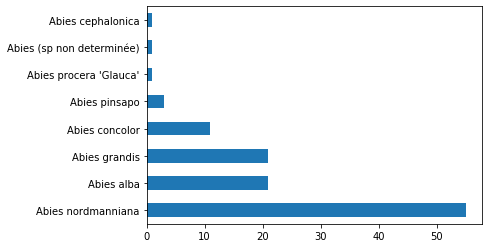

In [0]:
sapins['Libellé_Essence'].value_counts().plot("barh");

#### On veut faire des stastistiques par essence

On veut connaître la hauteur moyenne par essence pour chaque type *Abies*.

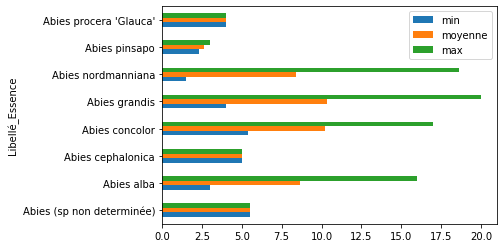

In [0]:
hauteurs_sapins = sapins.groupby(['Libellé_Essence'])["Hauteur arbre"]
hauteurs_sapins.max()
pd.concat([hauteurs_sapins.min().rename('min'),
           hauteurs_sapins.mean().rename('moyenne'),
           hauteurs_sapins.max().rename('max')],
           axis=1).plot(kind='barh');

###  Représentation géographique

On voudrait maintenant représenter la répartition des arbres par quartiers.

On utilise à nouveau les données ouvertes de la ville de Strasbourg, cette fois-ci concernant les quartiers : https://www.strasbourg.eu/decoupage-15-quartiers

On télécharge, on extrait l'archive et on liste son contenu.

In [0]:
download_unzip("https://www.strasbourg.eu/documents/976405/1168339/CUS_CUS_DUAH_QUART.zip", "quartiers")
%ls -R quartiers

quartiers:
SHP/  TAB/

quartiers/SHP:
Quartiers_Strasbourg_15.dbf  Quartiers_Strasbourg_15.shp
Quartiers_Strasbourg_15.prj  Quartiers_Strasbourg_15.shx

quartiers/TAB:
quartiers_strasbourg_15.DAT  quartiers_strasbourg_15.MAP
quartiers_strasbourg_15.ID   quartiers_strasbourg_15.TAB
quartiers_strasbourg_15.IND


C'est le fichier `.shp` qui nous intéresse.

À ce stade, nous avons besoin des bibliothèques [GeoPandas](http://geopandas.org/) et [Folium](https://folium.readthedocs.io/en/latest/) que l'on installe avec pip.

On installe les paquets nécessaires dans le kernel python courant.

On charge le fichier qui nous intéresse.

In [0]:
!pip install geopandas folium

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 11.8MB 28.8MB/s 
     |████████████████████████████████| 10.1MB 43.7MB/s 


In [0]:
import geopandas as gpd
quartiers = gpd.read_file("quartiers/SHP/Quartiers_Strasbourg_15.shp")
print("quartiers est de type {}.".format(type(quartiers)))
quartiers.head()

quartiers est de type <class 'geopandas.geodataframe.GeoDataFrame'>.


,QUARTIER,geometry
0,Orangerie_Conseil_des_XV,"POLYGON ((999397.484 113350.859, 999407.012 11..."
1,Bourse_Esplanade_Krutenau,"POLYGON ((999659.672 112595.826, 999708.798 11..."
2,Centre_ville,"POLYGON ((998119.310 111761.009, 998128.289 11..."
3,Gare_Tribunal,"MULTIPOLYGON (((998704.800 114095.066, 998786...."
4,Meinau,"POLYGON ((999467.976 107788.626, 999431.100 10..."


Avec Folium, on commence par représenter ces données géographiques sur un fond de cartes.

In [0]:
import folium

# On crée une carte initialement centrée sur Strasbourg
STRASBOURG_COORD = (48.58, 7.75)
stras_map = folium.Map(STRASBOURG_COORD, zoom_start=11, tiles='cartodbpositron')

# On ajoute les données des quartiers
folium.GeoJson(quartiers).add_to(stras_map)

# On enregistre dans un fichier html
stras_map.save('stras_map.html')

# On trace dans le notebook
display(stras_map)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


À l'emplacement de ces quartiers, on souhaite représenter une échelle de couleur en fonction de la densité d'arbres.

On constate que les noms de quartiers sont différents de ceux du jeu de données sur les arbres.

In [0]:
print(set(quartiers["QUARTIER"]), len(quartiers["QUARTIER"]))
print(set(arbres['Point vert Quartier usuel']), len(set(arbres['Point vert Quartier usuel'])))

{'Robertsau_Wacken', 'Meinau', 'Montagne_Verte', 'Koenigshoffen', 'Neudorf', 'Orangerie_Conseil_des_XV', 'Bourse_Esplanade_Krutenau', 'Cronenbourg', 'Port_du_Rhin', 'Centre_ville', 'Elsau', 'Gare_Tribunal', 'Neuhof', 'Neuhof2', 'Hautepierre_Poteries'} 15
{'KOENIGSHOFFEN', 'PORTE DE SCHIRMECK', 'TRIBUNAL', 'NEUHOF', 'ROBERTSAU', 'CONSEIL-XV', 'WACKEN', 'CRONENBOURG', 'NEUDORF', 'PORT DU RHIN', 'STOCKFELD', 'MONTAGNE VERTE', 'HAUTEPIERRE', 'MEINAU', 'ESPLANADE', 'MUSAU', 'BOURSE', 'CENTRE', 'KRUTENAU', 'ELSAU', 'PLAINE DES BOUCHERS', 'POLYGONE', 'ORANGERIE', 'GARE'} 24


On commence par mettre en minuscule les noms contenus dans le Dataframe `quartiers` et à remplacer les espaces par des underscores

In [0]:
quartiers["QUARTIER"] = quartiers["QUARTIER"].str.lower()
quartiers["QUARTIER"] = quartiers["QUARTIER"].str.replace('_', ' ')

À présent, on  convertit les noms dans le Dataframe `arbres` en supposant les correspondances ci-dessous.

In [0]:
convertion_dict = {"CENTRE": "centre ville",
                   ("BOURSE", "ESPLANADE", "KRUTENAU"): "bourse esplanade krutenau",
                   ("ORANGERIE", "CONSEIL-XV"): "orangerie conseil des xv",
                   ("GARE", "TRIBUNAL"): "gare tribunal",
                   ("HAUTEPIERRE", "POTERIE"): "hautepierre poteries",
                   "MUSAU": "NEUDORF",
                   "STOCKFELD": "NEUHOF2",
                   "PLAINE DES BOUCHERS": "MEINAU",
                   "POLYGONE": "NEUHOF",
                   "PORTE DE SCHIRMECK": "ELSAU",
                   ("ROBERTSAU", "WACKEN"): "ROBERTSAU WACKEN"}

for k, v in convertion_dict.items():
    arbres['Point vert Quartier usuel'] = arbres['Point vert Quartier usuel'].replace(to_replace=k, value=v)

arbres['Point vert Quartier usuel'] = arbres['Point vert Quartier usuel'].str.lower()
arbres.head()

,Num point vert,point vert NOM_USUEL,point vert ADRESSE,point vert VILLE,Point vert Quartier usuel,point vert TYPOLOGIE,n°arbre SIG,Libellé_Essence,Diam fût à 1m,Hauteur arbre
0,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15783,Tilia x 'Euchlora',25.0,8.0
1,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15784,Tilia x 'Euchlora',8.0,6.5
2,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15785,Tilia x 'Euchlora',33.0,7.5
3,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15786,Tilia x 'Euchlora',23.0,9.0
4,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15787,Tilia x 'Euchlora',27.0,9.0


On vérifie que l'ensemble des quartiers est le même pour les deux Dataframes `quartiers` et `arbres`.

In [0]:
set(quartiers["QUARTIER"]) == set(arbres['Point vert Quartier usuel'])

True

On construit une série qui contient le nombre d'arbres par quartier.

In [0]:
arbres_quartiers = arbres['Point vert Quartier usuel'].value_counts()

On trace le graphique en barres correspondant.

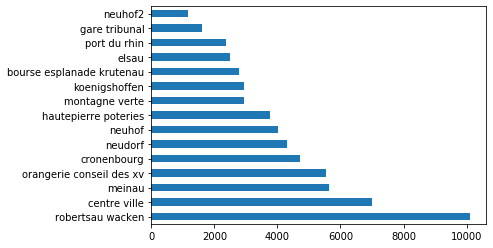

In [0]:
arbres_quartiers.plot(kind='barh');

On construit une nouvelle *Series* correspondant à l'aire de chaque quartier en $m^2$.

In [0]:
aires = quartiers.area
aires.index = quartiers["QUARTIER"]
aires

QUARTIER
orangerie conseil des xv     2.879849e+06
bourse esplanade krutenau    1.859666e+06
centre ville                 1.794049e+06
gare tribunal                3.019532e+06
meinau                       4.781329e+06
elsau                        1.872000e+06
robertsau wacken             1.804934e+07
hautepierre poteries         2.905796e+06
koenigshoffen                2.752843e+06
montagne verte               2.116881e+06
cronenbourg                  4.248864e+06
neuhof                       3.942835e+06
neudorf                      4.938573e+06
port du rhin                 4.332441e+06
neuhof2                      1.827937e+07
dtype: float64

On calcule la densité d'arbres par hectare.

In [0]:
densite = arbres_quartiers/aires*10000
densite

bourse esplanade krutenau    14.991937
centre ville                 39.056900
cronenbourg                  11.073549
elsau                        13.376071
gare tribunal                 5.365070
hautepierre poteries         12.994719
koenigshoffen                10.647176
meinau                       11.785426
montagne verte               13.902527
neudorf                       8.729243
neuhof                       10.157665
neuhof2                       0.628030
orangerie conseil des xv     19.195449
port du rhin                  5.461125
robertsau wacken              5.604082
dtype: float64

On trace une carte colorée par la densité d'arbres avec la méthode `choropleth`.

In [0]:
stras_map.choropleth(geo_data=quartiers, 
             data=densite,
             key_on='feature.properties.QUARTIER',
             fill_color='YlGn',
             fill_opacity=0.5,
             line_opacity=0.2,
             legend_name=r"Nombre d\'arbres par hectare")
stras_map.save('stras_tree.html')
display(stras_map)

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


### Exercice $(10\heartsuit)$

Ecrire la fonction `plot_essence()` qui prend en argument une essence d'arbres et qui trace le nombre d'arbres correspondant par quartier en utilisant `choropleth`.